In [45]:
import math
import warnings

from IPython.display import display
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor



pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Crime Data for NYC (2013)
#### "crime1" is the original data set of crimes that took place in NYC over the year 2013, while crime2013 is the new data set tailored to our project, documenting the features from the NYC crime report relevant to this project (Population, Murder, Robber, Property_Crime)

In [21]:
crime1 = pd.read_csv(r'C:/Users/ezzan/Downloads/python_drills/police drill.csv')
crime1 = crime1[0:348]
crime1= crime1.fillna(value=0)
crime2013 = []
crime2013 = crime1[['Population']]
crime2013['Murder'] = crime1[['Murder and\nnonnegligent\nmanslaughter']]
crime2013['Robbery'] = crime1[['Robbery']]
crime2013['Property_Crime'] = crime1[['Property\ncrime']]
crime2013['Violent_Crime'] = crime1[['Violent\ncrime']]
crime2013['Burglary'] = crime1[['Burglary']]
crime2013

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Population,Murder,Robbery,Property_Crime,Violent_Crime,Burglary
0,"1,861",0.000,0,12,0,2
1,"2,577",0.000,0,24,3,3
2,"2,846",0.000,0,16,3,1
3,"97,956",8.000,227,"4,090",791,705
4,"6,388",0.000,4,223,23,53
5,"4,089",0.000,3,46,5,10
6,"1,781",0.000,0,10,3,0
7,"118,296",1.000,31,"2,118",107,204
8,"9,519",0.000,4,210,9,16
9,"18,182",0.000,12,405,30,99


In [22]:
#data cleaning columns by removing non numerical numbers and converting the strings into numbers

crime2013['Violent_Crime'] = crime2013.Violent_Crime.str.replace(',','')
crime2013['Burglary'] = crime2013.Burglary.str.replace(',','')
crime2013['Population'] = crime2013.Population.str.replace(',','')
crime2013['Property_Crime'] = crime2013.Property_Crime.str.replace(',','')
crime2013['Robbery'] = crime2013.Robbery.str.replace(',','')
crime2013['Population'] = pd.to_numeric(crime2013['Population'])
crime2013['Robbery'] = pd.to_numeric(crime2013['Robbery'])
crime2013['Murder'] = pd.to_numeric(crime2013['Murder'])
crime2013['Property_Crime'] = pd.to_numeric(crime2013['Property_Crime'])
crime2013['Violent_Crime'] = pd.to_numeric(crime2013['Violent_Crime'])
crime2013['Burglary'] = pd.to_numeric(crime2013['Burglary'])

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is 

In [23]:
crime2013.head()

,Population,Murder,Robbery,Property_Crime,Violent_Crime,Burglary
0,1861,0.000,0,12,0,2
1,2577,0.000,0,24,3,3
2,2846,0.000,0,16,3,1
3,97956,8.000,227,4090,791,705
4,6388,0.000,4,223,23,53


In [24]:
#adding a new "per_capita" column (Property_Crime/Population) in order to properly account for significantly bigger populations
# such as NYC. Ultimately we dropped NYC because of its outlying affect.
crime2013['per_capita'] = crime2013['Property_Crime']/crime2013['Population']


c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
#big_city = crime2013.loc[lambda crime2013: crime2013['Population'] > 100000, :]
smallcity= crime2013.loc[lambda crime2013: crime2013['Population'] < 100000, :]
crime2013['big_city']= crime2013['Population'].apply(lambda x:1 if x > 50000 else 0)
#crime2013['small_city'] = np.where(crime2013['smallcity'] < 100000, 1, 0)
#crime2013['big_city'] = np.where(crime2013['bigcity'] >= 100000, 1, 0)
crime2013

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Population,Murder,Robbery,Property_Crime,Violent_Crime,Burglary,per_capita,big_city
0,1861,0.000,0,12,0,2,0.006,0
1,2577,0.000,0,24,3,3,0.009,0
2,2846,0.000,0,16,3,1,0.006,0
3,97956,8.000,227,4090,791,705,0.042,1
4,6388,0.000,4,223,23,53,0.035,0
5,4089,0.000,3,46,5,10,0.011,0
6,1781,0.000,0,10,3,0,0.006,0
7,118296,1.000,31,2118,107,204,0.018,1
8,9519,0.000,4,210,9,16,0.022,0
9,18182,0.000,12,405,30,99,0.022,0


#  KNN Test

Given our data set its time to test two features, "Property Crime" and "Burglary" and see based on the neighboring numbers, how accurately it predicts it is a "Big City" (over 50,000 people) or not.

We will start off with a neighboring number of 10.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=10)
X = crime2013[['Property_Crime','Burglary']]
Y = crime2013.big_city
neighbors.fit(X,Y)
print(neighbors.predict([[1000,2000]]))
print(neighbors.predict_proba([[1000,2000]]))

[0]
[[0.5 0.5]]


In [30]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=10)
X = crime2013[['Property_Crime','Burglary']]
Y = crime2013.big_city
neighbors.fit(X,Y)
print(neighbors.predict([[2500,2000]]))
print(neighbors.predict_proba([[2500,2000]]))

[1]
[[0.3 0.7]]


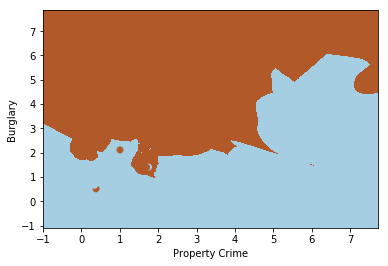

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn import neighbors


neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')


X = pd.DataFrame({
    'Property Crime': stats.zscore(crime2013.Property_Crime),
    'Burglary': stats.zscore(crime2013.Burglary)
})

# Fit our model.
Y = crime2013.big_city
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Property Crime')
plt.ylabel('Burglary')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


For the sake of experimention and finding a tighter comparison between the two weighted and uneweighted values, I manipulated the neighboring number.

## KNN of 10

In [43]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
scorew = cross_val_score(knn2, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (scorew.mean(), scorew.std() * 2))

Unweighted Accuracy: 0.38 (+/- 0.71)
Weighted Accuracy: 0.41 (+/- 0.74)


## KNN of 5

In [46]:
knn5 = neighbors.KNeighborsRegressor(n_neighbors=5)
knn5w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
score = cross_val_score(knn5, X, Y, cv=5)
print("k = 5, with loudness and duration inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn5w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

k = 5, with loudness and duration inputs
Unweighted Accuracy: 0.41 (+/- 0.74)
Weighted Accuracy: 0.29 (+/- 0.78)


## KNN of 20

In [47]:
knn20 = neighbors.KNeighborsRegressor(n_neighbors=20)
knn20w = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
score = cross_val_score(knn20, X, Y, cv=5)
print("k = 20, with loudness and duration inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn20w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

k = 20, with loudness and duration inputs
Unweighted Accuracy: 0.37 (+/- 0.49)
Weighted Accuracy: 0.31 (+/- 0.58)


Since KNN projects the closest relationship between the weighted and unweighted values, we"ll stick with that.


# KNN Test

Given our data set its time to test two features, "Property Crime" and "Burglary" and see based on the neighboring numbers, how accurately it predicts it is a "Big City" (over 50,000 people) or not.

We will start off with a neighboring number of 10.

### K = 10 Unweighted 

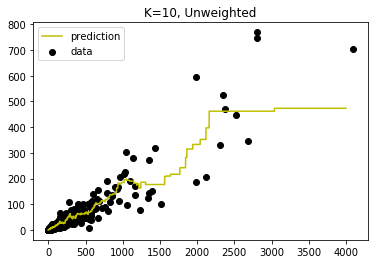

In [12]:
from sklearn import neighbors


knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(crime2013.Property_Crime)
Y = crime2013.Burglary
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 4000, .1)[:, np.newaxis]

Y2 = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y2, c='y', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

### K = 10 (weighted )

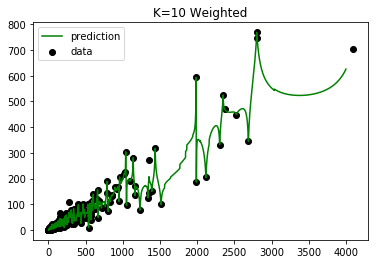

In [13]:
knn2 = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(crime2013.Property_Crime)
Y = crime2013.Burglary
knn2.fit(X, Y)


T = np.arange(0, 4000, 0.1)[:, np.newaxis]

Y2 = knn2.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y2, c='g', label='prediction')
plt.legend()
plt.title('K=10 Weighted')
plt.show()

In [16]:

X = crime2013.Property_Crime.ravel().reshape(-1, 1)
Y = crime2013.Burglary.ravel()


regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients-Linear Model:')
print(regr.coef_)

print('\nIntercept-Linear Model:')
print(regr.intercept_)

print('\nR-squared-Linear Model:')
print(regr.score(X, Y))

print('\nR-squared-KNN (k=10, unweighted):')
print(knn.score(X, Y))

print('\nR-squared-KNN (k=10, weighted):')
print(knn2.score(X, Y))


Coefficients-Linear Model:
[0.17916836]

Intercept-Linear Model:
-4.552877497525849

R-squared-Linear Model:
0.8558530728406456

R-squared-KNN (k=10, unweighted):
0.8426867836716607

R-squared-KNN (k=10, weighted):
0.9952046691850029


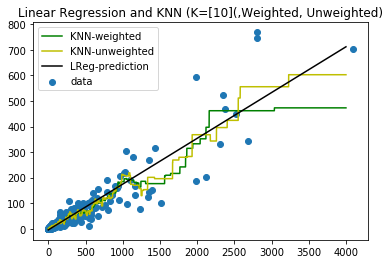

In [51]:
T = np.arange(0, 4000, 0.1)[:, np.newaxis]
X = crime2013.Property_Crime.ravel().reshape(-1, 1)
Y = crime2013.Burglary.ravel()
Y2 = knn.predict(T)
Y3 = knn2.predict(T)
Y4 = regr.intercept_ + regr.coef_*T
plt.scatter(X, Y, label='data')
plt.plot(T, Y2, c='g', label='KNN-weighted')
plt.plot(T, Y3, c='y', label='KNN-unweighted')
plt.plot(T, Y4, c='k', label='LReg-prediction')
plt.legend()
plt.title('Linear Regression and KNN (K=[10](,Weighted, Unweighted)')
plt.show()

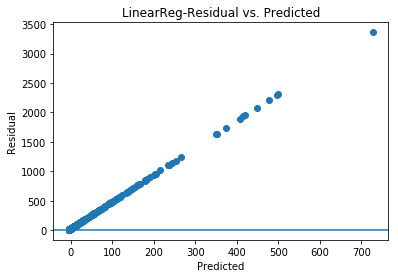

In [52]:
predicted = regr.predict(X).ravel()
actual = crime2013.Property_Crime
residual = actual - predicted

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('LinearReg-Residual vs. Predicted')
plt.show()

# OLS Model

SyntaxError: unexpected EOF while parsing (<ipython-input-54-818d6dc1617d>, line 13)